In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.max_columns = 100

%matplotlib inline

In [2]:
data = pd.read_csv('train.csv')

In [3]:
data.shape

(10000, 20)

In [4]:
data.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
0,14038,35,2.0,47.981561,29.442751,6.0,7,9.0,1969,0.089040,B,B,33,7976,5,NaN,0,11,B,184966.930730
1,15053,41,3.0,65.683640,40.049543,8.0,7,9.0,1978,0.000070,B,B,46,10309,1,240.0,1,16,B,300009.450063
2,4765,53,2.0,44.947953,29.197612,0.0,8,12.0,1968,0.049637,B,B,34,7759,0,229.0,1,3,B,220925.908524
3,5809,58,2.0,53.352981,52.731512,9.0,8,17.0,1977,0.437885,B,B,23,5735,3,1084.0,0,5,B,175616.227217
4,10783,99,1.0,39.649192,23.776169,7.0,11,12.0,1976,0.012339,B,B,35,5776,1,2078.0,2,4,B,150226.531644


Соотношения признаков с ценой

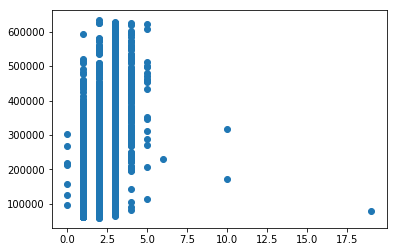

In [5]:
plt.scatter(data['Rooms'], data['Price']);

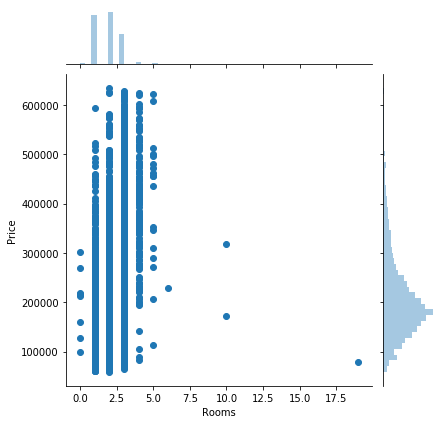

In [38]:
sns.jointplot(data['Rooms'], data['Price'])

(array([ 274.,  643., 1143., 1649., 1906., 1262.,  889.,  545.,  396.,
         335.,  251.,  186.,  148.,  106.,   87.,   67.,   43.,   29.,
          23.,   18.]),
 array([ 59174.77802758,  87877.7124547 , 116580.64688182, 145283.58130894,
        173986.51573605, 202689.45016317, 231392.38459029, 260095.31901741,
        288798.25344453, 317501.18787165, 346204.12229876, 374907.05672588,
        403609.991153  , 432312.92558012, 461015.86000724, 489718.79443436,
        518421.72886147, 547124.66328859, 575827.59771571, 604530.53214283,
        633233.46656995]),
 <a list of 20 Patch objects>)

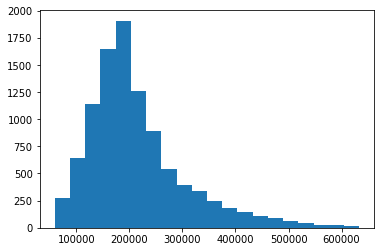

In [7]:
plt.hist(data['Price'], bins=20)

In [8]:
min_price = data['Price'].min()
min_price

59174.77802758122

In [9]:
max_price = data['Price'].max()
max_price

633233.4665699474

In [10]:
ls = np.linspace(min_price,max_price,21)
ls

array([ 59174.77802758,  87877.7124547 , 116580.64688182, 145283.58130894,
       173986.51573605, 202689.45016317, 231392.38459029, 260095.31901741,
       288798.25344453, 317501.18787165, 346204.12229876, 374907.05672588,
       403609.991153  , 432312.92558012, 461015.86000724, 489718.79443436,
       518421.72886147, 547124.66328859, 575827.59771571, 604530.53214283,
       633233.46656995])

In [11]:
qty_flat = []

for i in range(20):
    if i < 19:
        qty_flat.append(data.loc[(data['Price'] >= ls[i]) & (data['Price'] < ls[i+1]), :].shape[0])
    else:
        qty_flat.append(data.loc[(data['Price'] >= ls[i]) & (data['Price'] <= ls[i+1]), :].shape[0])

In [12]:
qty_flat = np.array(qty_flat, dtype = np.float64)
qty_flat

array([ 274.,  643., 1143., 1649., 1906., 1262.,  889.,  545.,  396.,
        335.,  251.,  186.,  148.,  106.,   87.,   67.,   43.,   29.,
         23.,   18.])

(array([3.713e+03, 6.115e+03, 1.680e+02, 1.000e+00, 0.000e+00, 2.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([ 0. ,  1.9,  3.8,  5.7,  7.6,  9.5, 11.4, 13.3, 15.2, 17.1, 19. ]),
 <a list of 10 Patch objects>)

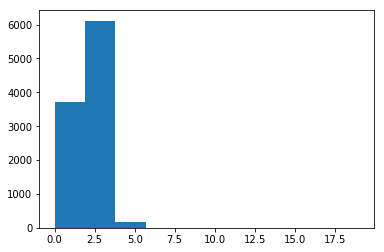

In [13]:
plt.hist(data['Rooms'])

In [14]:
data['Rooms'].unique()

array([ 2.,  3.,  1.,  4., 10.,  0.,  5., 19.,  6.])

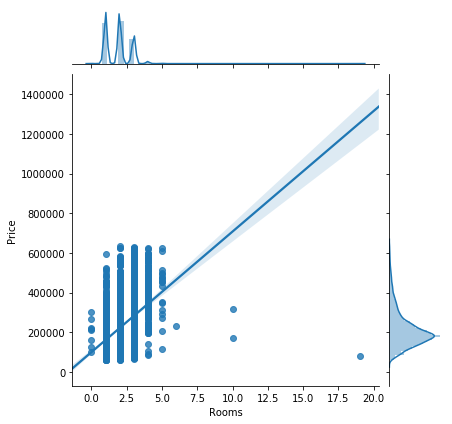

In [15]:
sns.jointplot(data['Rooms'], data['Price'], kind='reg')

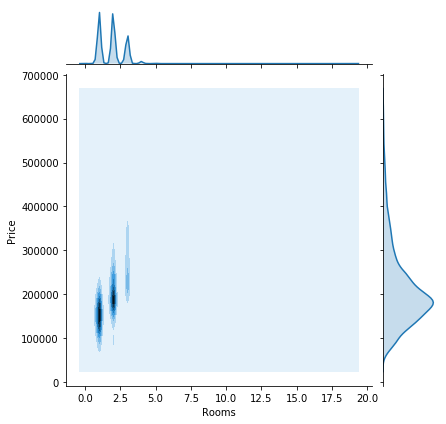

In [16]:
sns.jointplot(data['Rooms'], data['Price'], kind='kde') # плотность точек

Dummy-переменные

In [17]:
data.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
0,14038,35,2.0,47.981561,29.442751,6.0,7,9.0,1969,0.089040,B,B,33,7976,5,NaN,0,11,B,184966.930730
1,15053,41,3.0,65.683640,40.049543,8.0,7,9.0,1978,0.000070,B,B,46,10309,1,240.0,1,16,B,300009.450063
2,4765,53,2.0,44.947953,29.197612,0.0,8,12.0,1968,0.049637,B,B,34,7759,0,229.0,1,3,B,220925.908524
3,5809,58,2.0,53.352981,52.731512,9.0,8,17.0,1977,0.437885,B,B,23,5735,3,1084.0,0,5,B,175616.227217
4,10783,99,1.0,39.649192,23.776169,7.0,11,12.0,1976,0.012339,B,B,35,5776,1,2078.0,2,4,B,150226.531644


In [18]:
data.dtypes

Id                 int64
DistrictId         int64
Rooms            float64
Square           float64
LifeSquare       float64
KitchenSquare    float64
Floor              int64
HouseFloor       float64
HouseYear          int64
Ecology_1        float64
Ecology_2         object
Ecology_3         object
Social_1           int64
Social_2           int64
Social_3           int64
Healthcare_1     float64
Helthcare_2        int64
Shops_1            int64
Shops_2           object
Price            float64
dtype: object

In [19]:
pd.get_dummies(data).head() # метод выискивыает буквенные значения и превращает в численную переменную

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price,Ecology_2_A,Ecology_2_B,Ecology_3_A,Ecology_3_B,Shops_2_A,Shops_2_B
0,14038,35,2.0,47.981561,29.442751,6.0,7,9.0,1969,0.089040,33,7976,5,NaN,0,11,184966.930730,0,1,0,1,0,1
1,15053,41,3.0,65.683640,40.049543,8.0,7,9.0,1978,0.000070,46,10309,1,240.0,1,16,300009.450063,0,1,0,1,0,1
2,4765,53,2.0,44.947953,29.197612,0.0,8,12.0,1968,0.049637,34,7759,0,229.0,1,3,220925.908524,0,1,0,1,0,1
3,5809,58,2.0,53.352981,52.731512,9.0,8,17.0,1977,0.437885,23,5735,3,1084.0,0,5,175616.227217,0,1,0,1,0,1
4,10783,99,1.0,39.649192,23.776169,7.0,11,12.0,1976,0.012339,35,5776,1,2078.0,2,4,150226.531644,0,1,0,1,0,1


In [20]:
pd.get_dummies(data).shape

(10000, 23)

In [21]:
data = pd.get_dummies(data)

In [22]:
data.dtypes

Id                 int64
DistrictId         int64
Rooms            float64
Square           float64
LifeSquare       float64
KitchenSquare    float64
Floor              int64
HouseFloor       float64
HouseYear          int64
Ecology_1        float64
Social_1           int64
Social_2           int64
Social_3           int64
Healthcare_1     float64
Helthcare_2        int64
Shops_1            int64
Price            float64
Ecology_2_A        uint8
Ecology_2_B        uint8
Ecology_3_A        uint8
Ecology_3_B        uint8
Shops_2_A          uint8
Shops_2_B          uint8
dtype: object

DistrictId

In [23]:
data['DistrictId'].unique()

array([ 35,  41,  53,  58,  99,  59, 154,  74,   1,  23,  28,  31,  13,
        57,  27,  85,  34,  19,   0,  48,  54, 150,  11,  50,  61,  44,
        90, 200,  43, 177, 101,  38,  21, 103,  98, 170,  94,   5,  88,
        47,   6,  52,  62,  77,  79,   9, 156,  69, 108,  96, 169,  18,
       148, 128,  10, 144, 120,  39,   7,  84, 123, 159,  70, 129,   3,
        95,  78,  45,  15, 121,  49,  25,   2, 127,  56, 109,  46,  17,
       119,  80,  86,  83, 137,  91,  92, 118, 187,  36, 106, 161,  22,
        63, 167, 113,  66,  29,  37,  20,   8, 181,  40,  93,  30,  81,
       107, 130, 100,  12, 125,  67,  26,  89,  24, 111, 138,  64, 124,
       183,  55, 157, 151,  33,  87, 126, 155, 164, 105, 110, 132,  71,
        73, 189,  75, 122, 163, 141,  76, 115, 139, 143, 201, 165, 190,
       193, 174,  60, 114, 172, 134, 117, 149, 153, 131, 145,  82, 160,
        42,  32, 133, 208, 171, 176, 173, 147,  97, 142, 195, 180, 196,
       112,  72, 175,   4, 186, 146, 191, 168, 192,  14, 199, 13

In [24]:
data['DistrictId'].nunique()

205

In [25]:
data['DistrictId'].dtype

dtype('int64')

In [26]:
data['DistrictId'] = data['DistrictId'].astype(str)

In [27]:
data['DistrictId'].dtype

dtype('O')

In [28]:
data.dtypes

Id                 int64
DistrictId        object
Rooms            float64
Square           float64
LifeSquare       float64
KitchenSquare    float64
Floor              int64
HouseFloor       float64
HouseYear          int64
Ecology_1        float64
Social_1           int64
Social_2           int64
Social_3           int64
Healthcare_1     float64
Helthcare_2        int64
Shops_1            int64
Price            float64
Ecology_2_A        uint8
Ecology_2_B        uint8
Ecology_3_A        uint8
Ecology_3_B        uint8
Shops_2_A          uint8
Shops_2_B          uint8
dtype: object

In [29]:
pd.get_dummies(data).head()

,Id,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price,Ecology_2_A,Ecology_2_B,Ecology_3_A,Ecology_3_B,Shops_2_A,Shops_2_B,DistrictId_0,DistrictId_1,DistrictId_10,DistrictId_100,DistrictId_101,DistrictId_102,DistrictId_103,DistrictId_104,DistrictId_105,DistrictId_106,DistrictId_107,DistrictId_108,DistrictId_109,DistrictId_11,DistrictId_110,DistrictId_111,DistrictId_112,DistrictId_113,DistrictId_114,DistrictId_115,DistrictId_116,DistrictId_117,DistrictId_118,DistrictId_119,DistrictId_12,DistrictId_120,DistrictId_121,DistrictId_122,...,DistrictId_54,DistrictId_55,DistrictId_56,DistrictId_57,DistrictId_58,DistrictId_59,DistrictId_6,DistrictId_60,DistrictId_61,DistrictId_62,DistrictId_63,DistrictId_64,DistrictId_65,DistrictId_66,DistrictId_67,DistrictId_68,DistrictId_69,DistrictId_7,DistrictId_70,DistrictId_71,DistrictId_72,DistrictId_73,DistrictId_74,DistrictId_75,DistrictId_76,DistrictId_77,DistrictId_78,DistrictId_79,DistrictId_8,DistrictId_80,DistrictId_81,DistrictId_82,DistrictId_83,DistrictId_84,DistrictId_85,DistrictId_86,DistrictId_87,DistrictId_88,DistrictId_89,DistrictId_9,DistrictId_90,DistrictId_91,DistrictId_92,DistrictId_93,DistrictId_94,DistrictId_95,DistrictId_96,DistrictId_97,DistrictId_98,DistrictId_99
0,14038,2.0,47.981561,29.442751,6.0,7,9.0,1969,0.089040,33,7976,5,NaN,0,11,184966.930730,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,15053,3.0,65.683640,40.049543,8.0,7,9.0,1978,0.000070,46,10309,1,240.0,1,16,300009.450063,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,4765,2.0,44.947953,29.197612,0.0,8,12.0,1968,0.049637,34,7759,0,229.0,1,3,220925.908524,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,5809,2.0,53.352981,52.731512,9.0,8,17.0,1977,0.437885,23,5735,3,1084.0,0,5,175616.227217,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,10783,1.0,39.649192,23.776169,7.0,11,12.0,1976,0.012339,35,5776,1,2078.0,2,4,150226.531644,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


Группировка по району

In [30]:
data_stat1 = data.groupby(['DistrictId','Rooms'], as_index=False)[['Price']].mean().rename(columns={'Price':'mean_price'})
data_stat1.head(10)

,DistrictId,Rooms,mean_price
0,0,1.0,141262.601991
1,0,2.0,197998.146681
2,0,3.0,304170.518823
3,1,1.0,147454.605358
4,1,2.0,198777.278269
5,1,3.0,246262.924161
6,1,4.0,277290.705058
7,1,19.0,78364.616704
8,10,1.0,170966.418015
9,10,2.0,226197.554021


In [31]:
data_stat1.shape

(675, 3)

In [32]:
data = pd.merge(data, data_stat1, on=['DistrictId','Rooms'], how='left')

In [33]:
data.head(10)

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price,Ecology_2_A,Ecology_2_B,Ecology_3_A,Ecology_3_B,Shops_2_A,Shops_2_B,mean_price
0,14038,35,2.0,47.981561,29.442751,6.0,7,9.0,1969,0.089040,33,7976,5,NaN,0,11,184966.930730,0,1,0,1,0,1,213160.076297
1,15053,41,3.0,65.683640,40.049543,8.0,7,9.0,1978,0.000070,46,10309,1,240.0,1,16,300009.450063,0,1,0,1,0,1,303643.563728
2,4765,53,2.0,44.947953,29.197612,0.0,8,12.0,1968,0.049637,34,7759,0,229.0,1,3,220925.908524,0,1,0,1,0,1,259938.729121
3,5809,58,2.0,53.352981,52.731512,9.0,8,17.0,1977,0.437885,23,5735,3,1084.0,0,5,175616.227217,0,1,0,1,0,1,172368.882269
4,10783,99,1.0,39.649192,23.776169,7.0,11,12.0,1976,0.012339,35,5776,1,2078.0,2,4,150226.531644,0,1,0,1,0,1,155748.415754
5,12915,59,3.0,80.384479,46.683720,12.0,5,17.0,2011,0.309479,35,7715,4,990.0,0,6,215898.447742,0,1,0,1,0,1,400943.021226
6,14549,154,2.0,62.254114,37.160377,7.0,3,5.0,1960,0.460556,20,4386,14,NaN,1,5,296021.204377,0,1,0,1,0,1,253795.661825
7,11993,74,2.0,80.312926,NaN,0.0,14,0.0,1977,0.075779,6,1437,3,NaN,0,2,221244.156664,0,1,0,1,0,1,236250.931918
8,5172,1,2.0,64.511437,NaN,1.0,9,17.0,1977,0.007122,1,264,0,NaN,0,1,229102.795999,0,1,0,1,0,1,198777.278269
9,8649,23,1.0,46.461409,18.915552,8.0,13,17.0,2014,0.075779,6,1437,3,NaN,0,2,95380.220993,0,1,0,1,0,1,100961.810824


Корреляция признаков Price и mean_price по комнатам и районам

In [34]:
data.loc[:, ['Price', 'mean_price']].corr()

,Price,mean_price
Price,1.000000,0.803103
mean_price,0.803103,1.000000


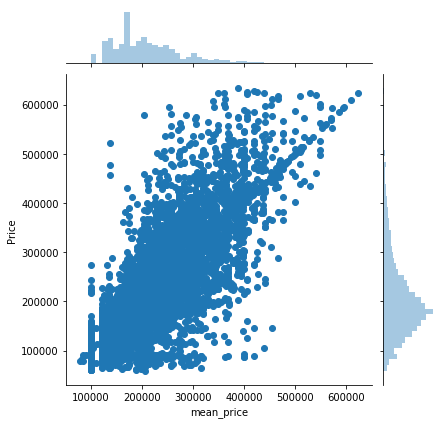

In [35]:
sns.jointplot(data['mean_price'],data['Price'])

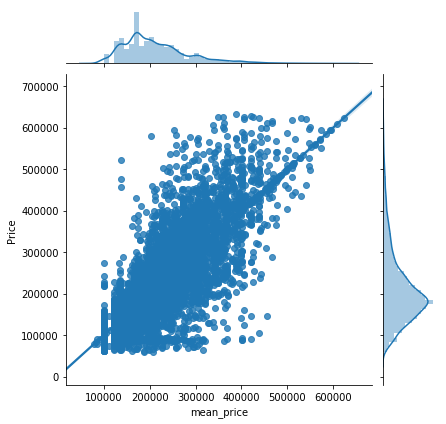

In [36]:
sns.jointplot(data['mean_price'],data['Price'], kind='reg')

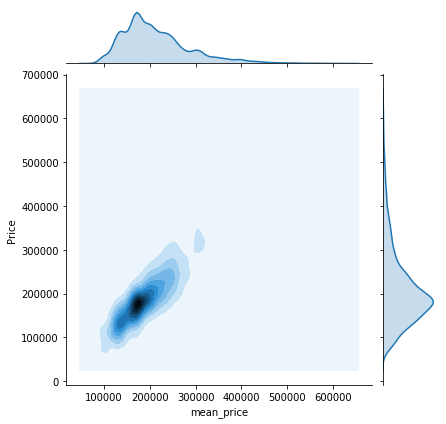

In [37]:
sns.jointplot(data['mean_price'],data['Price'], kind='kde')